In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
filename = '../data/0&1/processed_data.csv'
data = pd.read_csv(filename)

In [3]:
data

,X,flag,alon_week,alon_wend,child_bull,comp_house,comp_noint_bed_16,comp_int_bed_16,comp_week,comp_wend,...,talk_phon_wend,text_week,text_wend,tran_week,tran_wend,tv_week,tv_wend,weight_16,work_week,work_wend
0,1,synthetic,1-2 hours,1-2 hours,No,Yes,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,1-2 hours,1-2 hours,59.294132,3 or more hours,3 or more hours
1,2,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.812426,NaN,NaN
4,5,synthetic,1-2 hours,3 or more hours,No,NaN,Yes,NaN,1-2 hours,Less than 1 hour,...,Not at all,Not at all,Not at all,Less than 1 hour,Less than 1 hour,1-2 hours,3 or more hours,62.270030,1-2 hours,1-2 hours
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13730,13731,synthetic,1-2 hours,3 or more hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Not at all,Less than 1 hour,Less than 1 hour,Less than 1 hour,Less than 1 hour,3 or more hours,3 or more hours,NaN,1-2 hours,1-2 hours
13731,13732,synthetic,1-2 hours,1-2 hours,No,NaN,NaN,NaN,1-2 hours,1-2 hours,...,Any at all,1-2 hours,1-2 hours,1 or more hours,1 or more hours,3 or more hours,3 or more hours,58.075832,Less than 1 hour,Less than 1 hour
13732,13733,synthetic,Less than 1 hour,1-2 hours,No,Yes,NaN,NaN,Less than 1 hour,1-2 hours,...,Any at all,1-2 hours,1-2 hours,Less than 1 hour,Less than 1 hour,Not at all,Less than 1 hour,NaN,Less than 1 hour,1-2 hours


In [4]:
dict_all = {
    
}

In [5]:
Xs = ['comp_week', 'comp_wend', 'text_week', 'text_wend', 'tv_week', 'tv_wend']

targets  = ['dep_score', 'dep_thoughts', 'has_dep_diag', 'prim_diag', 'secd_diag', 'panic_score']

In [6]:
# Directly related
for x in Xs:
    features = data[[x]].copy()
    features.loc[features[x] == 'Not at all', x] = 0
    features.loc[features[x] == 'Less than 1 hour', x] = 1
    features.loc[features[x] == '1-2 hours', x] = 2
    features.loc[features[x] == '3 or more hours', x] = 3
    
    if x == 'comp_week':
        pd_xs = features
    else:
        pd_xs[x] = features


In [7]:
pd_xs

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend
0,2,2,1,1,2,2
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,0,0,2,3
...,...,...,...,...,...,...
13729,NaN,NaN,NaN,NaN,NaN,NaN
13730,2,2,1,1,3,3
13731,2,2,2,2,3,3
13732,1,2,2,2,0,1


In [8]:
# Integrate all y target columns with directly_related to the screen time
for x in targets:    
    pd_xs[x] = data[[x]]

In [9]:
pd_xs

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score,dep_thoughts,has_dep_diag,prim_diag,secd_diag,panic_score
0,2,2,1,1,2,2,0.0,NaN,No ICD-10 diagnosis of depression,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,1,0,0,2,3,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
13729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13730,2,2,1,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN
13731,2,2,2,2,3,3,NaN,NaN,NaN,NaN,NaN,NaN
13732,1,2,2,2,0,1,0.0,NaN,No ICD-10 diagnosis of depression,0.0,0.0,0.0


In [10]:
# Create inidivudla dataframe of each target and drop NaN
for x in targets:
    tem = Xs.copy()
    filter_list = tem.append(x)
    
    dict_all[x] = pd_xs.filter(tem, axis=1).dropna(axis=0)

In [11]:
# Convert has_dep_diag to 0 or 1
dict_all['has_dep_diag'] = dict_all['has_dep_diag'].replace([' No ICD-10 diagnosis of depression'], 0)
dict_all['has_dep_diag'] = dict_all['has_dep_diag'].replace(['Yes ICD-10 diagnosis of depression'], 1)

In [12]:
dict_all['dep_score']

,comp_week,comp_wend,text_week,text_wend,tv_week,tv_wend,dep_score
0,2,2,1,1,2,2,0.0
5,2,1,1,1,2,3,0.0
8,3,3,3,1,2,2,0.0
18,1,2,1,1,1,2,0.0
24,2,3,0,0,2,2,0.0
...,...,...,...,...,...,...,...
13716,3,3,2,2,2,3,0.0
13720,2,3,1,1,1,2,0.0
13722,0,0,0,0,2,0,0.0
13725,2,3,1,1,1,2,2.0


In [13]:
num_all = {}

num_all['dep_score'] = dict(sorted(dict_all['dep_score']['dep_score'].value_counts().items()))
num_all['dep_thoughts'] = dict(sorted(dict_all['dep_thoughts']['dep_thoughts'].value_counts().items()))
num_all['has_dep_diag'] = dict(sorted(dict_all['has_dep_diag']['has_dep_diag'].value_counts().items()))
num_all['prim_diag'] = dict(sorted(dict_all['prim_diag']['prim_diag'].value_counts().items()))
num_all['secd_diag'] = dict(sorted(dict_all['secd_diag']['secd_diag'].value_counts().items()))
num_all['panic_score'] = dict(sorted(dict_all['panic_score']['panic_score'].value_counts().items()))

In [14]:
dict_all['dep_score']['dep_score'].value_counts()

0.0    2339
1.0     316
2.0     198
3.0     122
4.0      68
Name: dep_score, dtype: int64

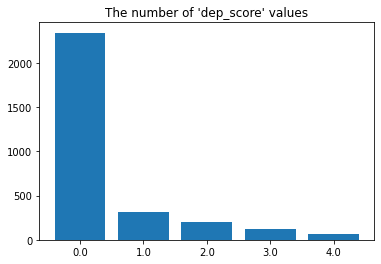

In [15]:
x = np.arange(len(num_all['dep_score']))
values = [num_all['dep_score'][i] for i in num_all['dep_score']]

plt.bar(x, values)
plt.xticks(x, num_all['dep_score'].keys())
plt.title("The number of 'dep_score' values")
plt.show()

In [16]:
dict_all['dep_thoughts']['dep_thoughts'].value_counts()

1.0    635
2.0    204
3.0    149
4.0    138
5.0     66
0.0     62
Name: dep_thoughts, dtype: int64

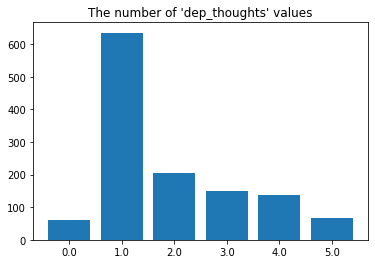

In [17]:
x = np.arange(len(num_all['dep_thoughts']))
values = [num_all['dep_thoughts'][i] for i in num_all['dep_thoughts']]

plt.bar(x, values)
plt.xticks(x, num_all['dep_thoughts'].keys())
plt.title("The number of 'dep_thoughts' values")
plt.show()

In [18]:
dict_all['has_dep_diag']['has_dep_diag'].value_counts()

0    2801
1     242
Name: has_dep_diag, dtype: int64

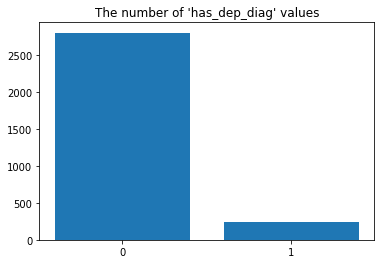

In [19]:
x = np.arange(len(num_all['has_dep_diag']))
values = [num_all['has_dep_diag'][i] for i in num_all['has_dep_diag']]

plt.bar(x, values)
plt.xticks(x, num_all['has_dep_diag'].keys())
plt.title("The number of 'has_dep_diag' values")
plt.show()

In [20]:
dict_all['prim_diag']['prim_diag'].value_counts()

0.0     2430
1.0      179
11.0     110
10.0      75
2.0       64
12.0      57
5.0       54
6.0       46
8.0       14
4.0        7
7.0        4
9.0        3
Name: prim_diag, dtype: int64

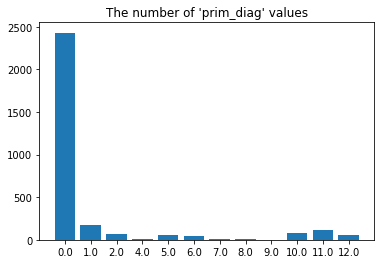

In [21]:
x = np.arange(len(num_all['prim_diag']))
values = [num_all['prim_diag'][i] for i in num_all['prim_diag']]

plt.bar(x, values)
plt.xticks(x, num_all['prim_diag'].keys())
plt.title("The number of 'prim_diag' values")
plt.show()

In [22]:
dict_all['secd_diag']['secd_diag'].value_counts()

0.0    2721
1.0     136
8.0      55
4.0      37
2.0      31
5.0      28
9.0      18
6.0      14
7.0       3
Name: secd_diag, dtype: int64

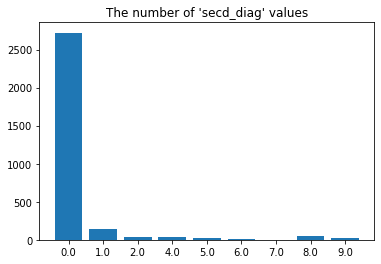

In [23]:
x = np.arange(len(num_all['secd_diag']))
values = [num_all['secd_diag'][i] for i in num_all['secd_diag']]

plt.bar(x, values)
plt.xticks(x, num_all['secd_diag'].keys())
plt.title("The number of 'secd_diag' values")
plt.show()

In [24]:
dict_all['panic_score']['panic_score'].value_counts()

0.0    2983
1.0      27
2.0      14
3.0      11
4.0       8
Name: panic_score, dtype: int64

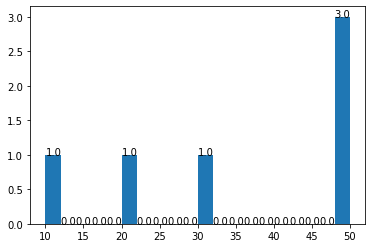

In [25]:
your_bins=20
data=[10, 20, 30, 50, 50, 50]
arr=plt.hist(data,bins=your_bins)
for i in range(your_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

Text(0.5, 1.0, "The number of 'panic_score' values")

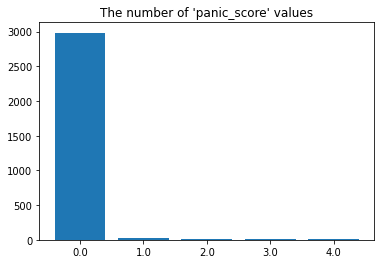

In [26]:
x = np.arange(len(num_all['panic_score']))
values = [num_all['panic_score'][i] for i in num_all['panic_score']]

plt.bar(x, values)
plt.xticks(x, num_all['panic_score'].keys())
plt.title("The number of 'panic_score' values")

In [27]:
values

[2983, 27, 14, 11, 8]

# all

<ipython-input-28-00c018355eca>:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(x, num_all['dep_score'].keys())
<ipython-input-28-00c018355eca>:19: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax2.set_xticks(x, num_all['dep_thoughts'].keys())
<ipython-input-28-00c018355eca>:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax4.set_xticks(x, num_all['prim_diag'].keys())
<ipython-input-28-00c018355eca>:52: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will becom

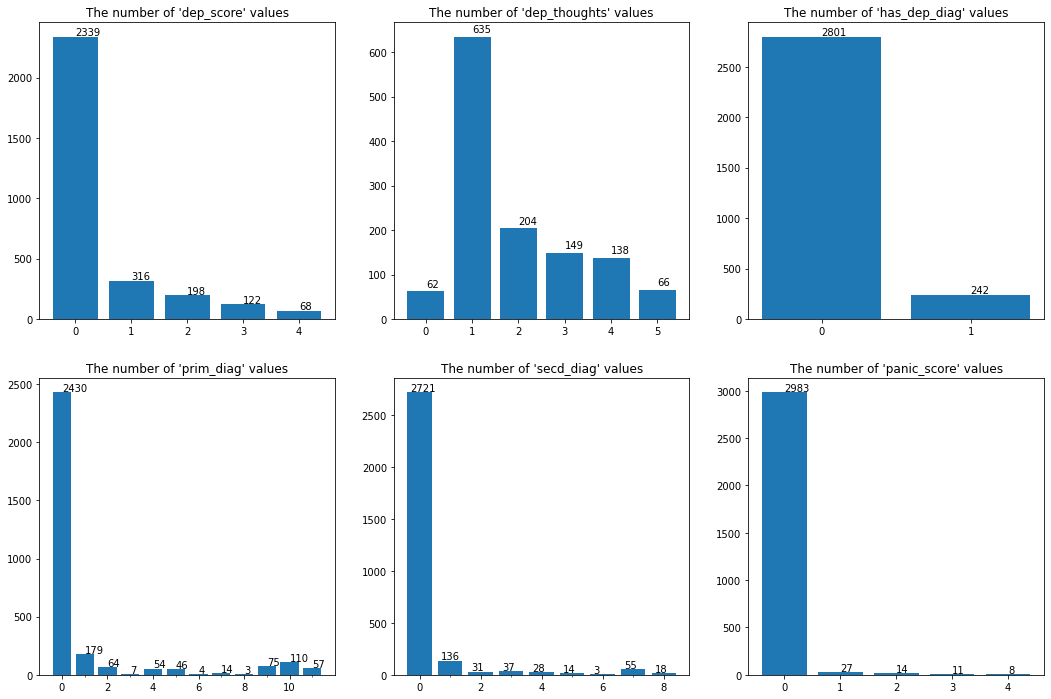

In [28]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))

# dep score 
x = np.arange(len(num_all['dep_score']))
values = [num_all['dep_score'][i] for i in num_all['dep_score']]

ax1.bar(x, values)
ax1.set_xticks(x, num_all['dep_score'].keys())
ax1.set_title("The number of 'dep_score' values")

for i in range(len(values)):
    ax1.text(i, values[i]+10, values[i])
    
# dep thoughts
x = np.arange(len(num_all['dep_thoughts']))
values = [num_all['dep_thoughts'][i] for i in num_all['dep_thoughts']]

ax2.bar(x, values)
ax2.set_xticks(x, num_all['dep_thoughts'].keys())
ax2.set_title("The number of 'dep_thoughts' values")

for i in range(len(values)):
    ax2.text(i, values[i]+10, values[i])
    
# has dep_diag
x = np.arange(len(num_all['has_dep_diag']))
values = [num_all['has_dep_diag'][i] for i in num_all['has_dep_diag']]

ax3.bar(x, values)
ax3.set_xticks([0, 1])
ax3.set_title("The number of 'has_dep_diag' values")

for i in range(len(values)):
    ax3.text(i, values[i]+10, values[i])
    
# prim diag 
x = np.arange(len(num_all['prim_diag']))
values = [num_all['prim_diag'][i] for i in num_all['prim_diag']]

ax4.bar(x, values)
ax4.set_xticks(x, num_all['prim_diag'].keys())
ax4.set_title("The number of 'prim_diag' values")

for i in range(len(values)):
    ax4.text(i, values[i]+10, values[i])
    
# secd_diag
x = np.arange(len(num_all['secd_diag']))
values = [num_all['secd_diag'][i] for i in num_all['secd_diag']]

ax5.bar(x, values)
ax5.set_xticks(x, num_all['secd_diag'].keys())
ax5.set_title("The number of 'secd_diag' values")

for i in range(len(values)):
    ax5.text(i-0.3, values[i]+10, values[i])
    
# panic score
x = np.arange(len(num_all['panic_score']))
values = [num_all['panic_score'][i] for i in num_all['panic_score']]

ax6.bar(x, values)
ax6.set_xticks(x, num_all['panic_score'].keys())
ax6.set_title("The number of 'panic_score' values")

for i in range(len(values)):
    ax6.text(i, values[i]+10, values[i])